
# Project: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [82]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


This data set speaks about the missed Doctor appointments there are a lot of variable to take care of when see why someone didn't come for a specifc appointment and in this project we will explore different questions which will help answer some of these questions


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [83]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [84]:
#Getting some info about the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [85]:
#Checking for duplicates 
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: bool

In [86]:
#Checking for Null items 
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [87]:
#knowing the numbers of each gender
# I will define a function to do so 
def Val_count(column_label):
    print(df[column_label].value_counts())

In [88]:
Val_count('Gender')

F    71840
M    38687
Name: Gender, dtype: int64


In [89]:
#The mean age 
df['Age'].mean()

37.08887421173107

In [90]:
#Hipertension numbers 
Val_count('Hipertension')

0    88726
1    21801
Name: Hipertension, dtype: int64


In [91]:
#Diabetes numbers 
Val_count('Diabetes')

0    102584
1      7943
Name: Diabetes, dtype: int64


In [92]:
#Alcoholism numbers
df['Alcoholism'].value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

In [93]:
#The number of Missed Appointments
Val_count('No-show')

No     88208
Yes    22319
Name: No-show, dtype: int64



### Data Cleaning
#### This data is clean there is not a lot of work to be done for it but there are some small changes that will be done in the next sections

In [94]:
#Making all names in lower case so is easier to manipulate
df.columns = df.columns.str.lower()
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

In [95]:
#Making no-show more comprehensible
#First: making its name show   
df.rename(columns={'no-show':'show'},inplace=True)
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [96]:
#Second: change each no to be 1 and Yes to 0 
df['show'].replace('No',1,inplace=True)
df['show'].replace('Yes',0,inplace=True)
df.head(15)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,1
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,0
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,0
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,1
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,1


In [97]:
#Remove the data that is not relative to our Work
un_related = ['patientid','appointmentid']
df.drop(un_related,axis=1,inplace=True)
df.head(5)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [98]:
#Removing the duplicates 
#first: Check
df.duplicated().sum()

635

In [99]:
#Second: Droping the duplicated items 
df.drop_duplicates(inplace=True)

#Cheking again
df.duplicated().sum()

0

In [100]:
#Change the type of the Scheduled day and Appointment day to date.time
#But first we must remove the Z letter
df['scheduledday'] = df['scheduledday'].replace({'Z':''},regex=True)
df['appointmentday'] = df['appointmentday'].replace({'Z':''},regex=True)
df.head(5)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,F,2016-04-29T18:38:08,2016-04-29T00:00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29T16:08:27,2016-04-29T00:00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29T16:19:04,2016-04-29T00:00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29T17:29:31,2016-04-29T00:00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29T16:07:23,2016-04-29T00:00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [101]:
#After removing the Z, I realized that there is no specific time in the appointment day 
#So I will remove it 
df['appointmentday'] = df['appointmentday'].apply(lambda x: x.split("T")[0])
df.head(1)


,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,F,2016-04-29T18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1


In [102]:
#After that i will make the Scheduled day and Appointment day into datetime
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (what is the neighbourhood correlation with the appointements ?)

In [103]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.head(5)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1


Text(0, 0.5, 'Appointments Done')

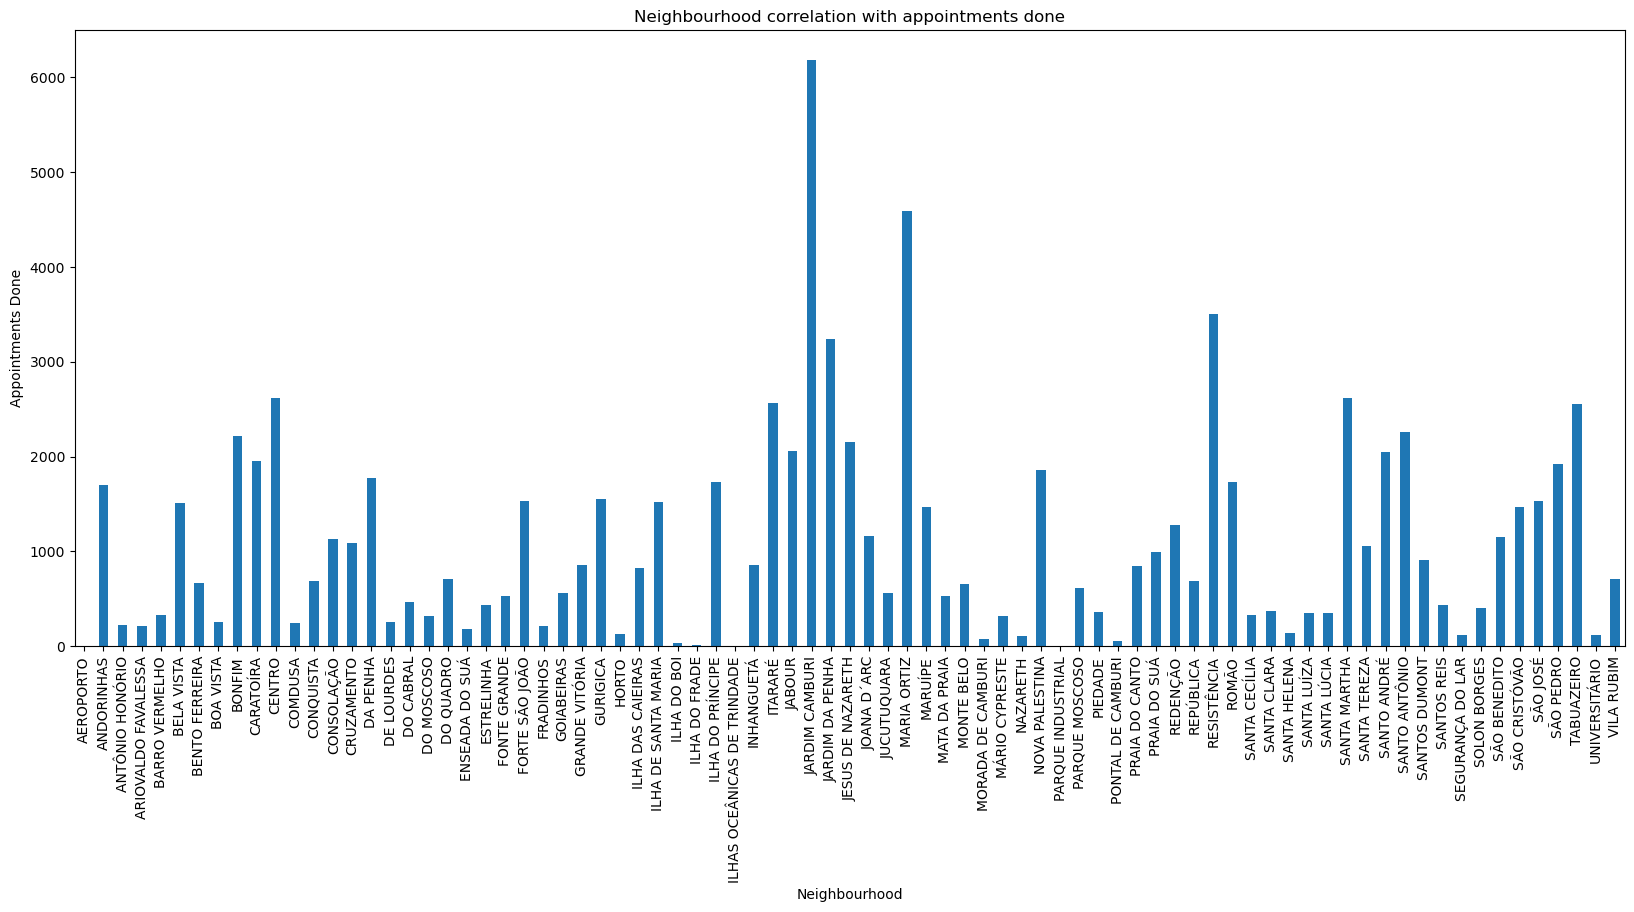

In [104]:
#The correlation between the neighbourhood and the appointment
df.groupby('neighbourhood')['show'].sum().plot(kind='bar',figsize=(20,8), title='Neighbourhood correlation with appointments done')
plt.xlabel('Neighbourhood')
plt.ylabel('Appointments Done')

### Research Question 2  (Do High age means more missed appointments ?)

In [105]:
#first we can fin the median age 
median = df['age'].median()
median

37.0

In [106]:
#Determine the ones who are above the median and below
above = df.query('age > 37')
below = df.query('age < 37')

Text(0, 0.5, 'Appointments Done')

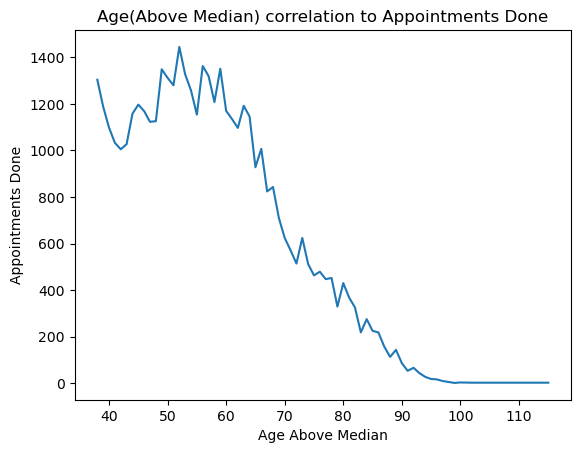

In [107]:
#ploting the above average
above.groupby('age')['show'].sum().plot(title='Age(Above Median) correlation to Appointments Done')
plt.xlabel('Age Above Median')
plt.ylabel('Appointments Done')

Text(0, 0.5, 'Appointments Done')

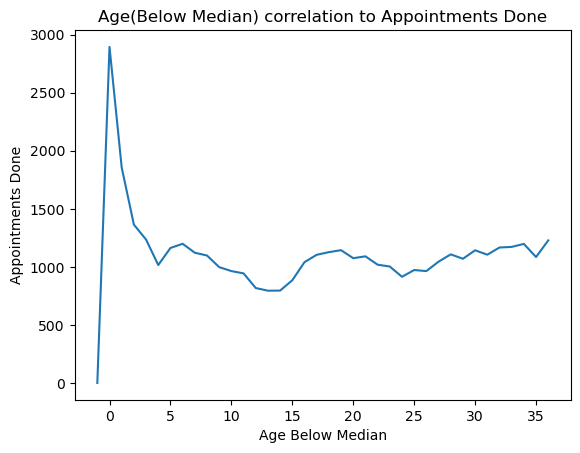

In [108]:
#ploting the Below average
below.groupby('age')['show'].sum().plot(title='Age(Below Median) correlation to Appointments Done')
plt.xlabel('Age Below Median')
plt.ylabel('Appointments Done')

<a id='conclusions'></a>
## Conclusions

### Firstly: The Findings 

 From the graphs and finidings that was introduced earlier we can answer the two main question that we have asked:
 #### 1.What is the neighbourhood correlation with the appointements ?
 #### 2.Do High age means more missed appointments ?

 The answer for the first question is that there are a correlation between the neighbourhood and the number of appointments met but the first limitation comes when we try to answer this question in deep details because we don't have enough data in this data set about each neighbourhood circumstances and so this question can be answered more deeply.

 The  answer for the second question is clearly visble because we have all the data we need to answer this question; we can conclude that there are a ceratin ages where people have high rate of meeting the appointments, and so we can conclude that these certain ages need more Care.

 as an example the early years of life (under 5 years) need a lot of care so the appoitments done for them skyrockets  


### Secondly: The limitations

As we can see There are small limitations in this data set because there are some background knowledge that can determine a lot more if they were present; 

as an example: neighbourhood circumstances, the severity of the health issues, and many more. 

and these limitations makes it harder to make a complete analysis for this part of the world or for this group of people